### Classfication

+ Today we'll be working with the Iris dataset
+ First we'll explore
+ Then we'll build a terrible classifer
+ Then we'll build a KNN classifer!

In [43]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns

%matplotlib inline

iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
irisdf.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


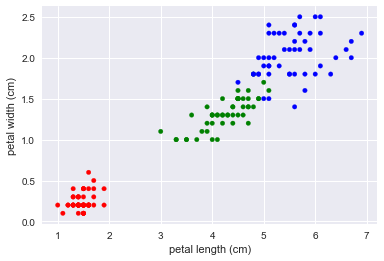

In [3]:
#print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()


cmap = {'0': 'r', '1': 'g', '2': 'b' }

irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])

irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)



### Let's make a dumb classifier

+ This is not a good classifier
+ It's to illustrate the idea of classifiers
+ When will we make a good one? Later, I promise

+ For now, let's investigate using the quantile function

In [8]:
print irisdf['petal length (cm)'].quantile(1.00)
print irisdf['petal length (cm)'].max()
print irisdf['petal length (cm)'].quantile(0.66)
print irisdf['petal length (cm)'].quantile(0.33)

6.9
6.9
4.834
2.087


In [9]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1
    
predictions = irisdf.apply(my_classifier, axis=1)

## So, how did we do?

In [10]:
irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.666666666667


### Chopping up a linear variable

In [23]:
Q3 = irisdf['petal length (cm)'].quantile(0.75)
Q2 = irisdf['petal length (cm)'].quantile(0.50)
Q1 = irisdf['petal length (cm)'].quantile(0.25)

irisdf.loc["Quartile"] = "0"

irisdf.loc[irisdf['petal length (cm)']>Q3, 'Quartile'] = "Q4"
irisdf.loc[(irisdf['petal length (cm)']>Q2)&(irisdf['petal length (cm)']<=Q3), 'Quartile'] = "Q3"
irisdf.loc[(irisdf['petal length (cm)']>Q1)&(irisdf['petal length (cm)']<=Q2), 'Quartile'] = "Q2"
irisdf.loc[irisdf['petal length (cm)']<=Q1, 'Quartile'] = "Q1"

In [29]:
irisdf.loc[irisdf['petal length (cm)']<=Q1] 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,ctarget,predictions,Quartile
0,5.1,3.5,1.4,0.2,0,r,0,Q1
1,4.9,3,1.4,0.2,0,r,0,Q1
2,4.7,3.2,1.3,0.2,0,r,0,Q1
3,4.6,3.1,1.5,0.2,0,r,0,Q1
4,5,3.6,1.4,0.2,0,r,0,Q1
6,4.6,3.4,1.4,0.3,0,r,0,Q1
7,5,3.4,1.5,0.2,0,r,0,Q1
8,4.4,2.9,1.4,0.2,0,r,0,Q1
9,4.9,3.1,1.5,0.1,0,r,0,Q1
10,5.4,3.7,1.5,0.2,0,r,0,Q1


### In Class Exercise 

+ Work on improving the classifier below.

+ Could we add another cutoff to fix our mediocre classifier? 

+ What is missing below? 

In [ ]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

### Using distance: KNN implementation

In [45]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()

# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)

print knn.score(iris.data[:,2:], iris.target)

0.96


### But what does this score look like? 

+ Lets print out the raw outcome var vs predicted outcome

In [31]:
print "predicted outcome", knn.predict(iris.data[:,2:])
print "observed outcome", iris.target


predicted outcome [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
observed outcome [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Do we see a change in performance when using the distance weight?

In [37]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here
knn.fit(iris.data[:,2:], iris.target)
#print knn.predict(iris.data[:,2:])
#print iris.target

print knn.score(iris.data[:,2:], iris.target)

0.993333333333


### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [42]:
iris = datasets.load_iris()

In [54]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

k = range(2, 25)# some *list of numbers*! Make this go to 100!
params = {'n_neighbors':k, 'weights':['uniform', 'distance'], 
         'metric':['minkowski', 'manhattan']}# Specify the parameter you're changing as a dictionary key
            # Specify the *list of numbers* as the dictionary value!

kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)
gs.grid_scores_

[mean: 0.90667, std: 0.09752, params: {'n_neighbors': 2, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.92667, std: 0.06799, params: {'n_neighbors': 2, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 3, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 3, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 4, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 4, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 5, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 5, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 6, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 6, 'metric': 'm

## Not lets plot that, because it's not easy to just look at grid scores

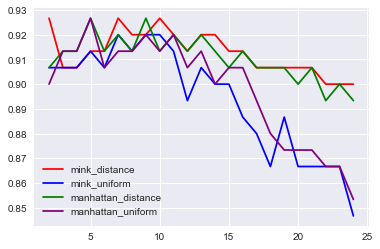

In [63]:
mink_dist, = plt.plot(k,[s[1] for s in  gs.grid_scores_[1::2][0:len(gs.grid_scores_[1::2])/2]], color='red', label='mink_distance')
mink_uni, = plt.plot(k,[s[1] for s in  gs.grid_scores_[::2][0:len(gs.grid_scores_[::2])/2]], color='blue', label = 'mink_uniform')
man_dist, = plt.plot(k,[s[1] for s in  gs.grid_scores_[1::2][len(gs.grid_scores_[1::2])/2:]], color='green', label='manhattan_distance')
man_uni, = plt.plot(k,[s[1] for s in  gs.grid_scores_[::2][len(gs.grid_scores_[::2])/2:]], color='purple', label = 'manhattan_uniform')
plt.legend(handles=[mink_dist, mink_uni, man_dist, man_uni])

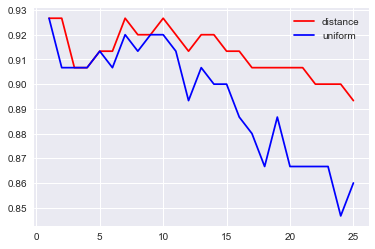

In [50]:

line_up, = plt.plot(k[:25],[s[1] for s in  gs.grid_scores_[1:50:2]], color='red', label='distance')
line_down, = plt.plot(k[:25],[s[1] for s in  gs.grid_scores_[:50:2]], color='blue', label = 'uniform')
plt.legend(handles=[line_up, line_down])

### Remember these functions!
+ How do they match up with the graphs above?


In [64]:
print gs.best_score_


0.926666666667


In [65]:
print gs.best_params_


{'n_neighbors': 2, 'metric': 'minkowski', 'weights': 'distance'}


In [66]:
print gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')
